<div align="center">

# **Machine Learning - Classificação por trás dos panos**

</div>

<div align="center">

<img src="https://www.neurotech.com.br/wp-content/uploads/2019/09/Deep-Learning.png" width="550" height="300">

</div>

Neste notebook estou deixando minhas anotações de estudos sobre os seguintes modelos de Classificação em Machine Learning: o **K-Nearest Neighbors (KNN)**, o **Bernoulli Naive Bayes (BNN)**, e o **Decision Tree (Árvore de Decisão)**. O objetivo é entender melhor o funcionamento desses modelos e a matemática utilizada por eles.



# Classificação

## Base de dados

A base de dados utilizada durante o curso é proveniente da plataforma Kaggle e pode ser encontrada neste [link](https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-20.csv). Essa base passou por alguns tratamentos e por esse motivo está levemente diferente da disponibilizada no Kaggle.

Para baixar a base de dados tratada, você pode clicar [aqui](https://github.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/tree/main/Dados).

## Importando os dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv')

In [ ]:
dados.shape

(7043, 18)

In [ ]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


Aqui podemos ver que possuimos várias informações sobre os clientes que assinam o serviço. Entretanto, a informação que estamos interessado é a da coluna **Churn**, que mostra quais clientes cancelaram o serviço.

## Variáveis categóricas

Agora vamos começar tratando as variáveis categóricas binárias, substituindo sim por 1 e não por 0. Que é o formato ideal para trabalhar com algoritmos de Machine Learning.

In [ ]:
substituicao = {'Sim' : 1, 'Nao': 0}

dadosbinarios = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(substituicao)

In [ ]:
dadosbinarios.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


Agora a máquina vai ser capaz de entender essas informações, porém havia outras colunas na nossa base de dados com informações além de sim e não como, por exemplo, o próprio serviço telefônico, se a pessoa tem ou não, sem serviço telefônico, o tipo de internet.

Para lidar com essas informações, iremos utilizar a função `get_dummies`. Essa função vai pegar as colunas e identificar as categorias presentes nessas colunas. E a partir de um loop vai pegar todas essas categorias presentes nas colunas e transformar em novas colunas binarizadas.

Para isso, primeiramente iremos pegar a nossa base de dados original e remover as colunas que já foram tratadas.

In [ ]:
dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1, inplace=True)

Agora iremos pegar essas colunas categóricas não-binárias e binarizar elas, utilizando o `get_dummies`.

In [ ]:
dummie_dados = pd.get_dummies(dados)

Você pode ta se perguntando agora, mas e as colunas numéricas? Aquelas que representavam medidas quantitativas, como **MesesDeContrato** e **ContaMensal**?

Fique tranquilo, o `get_dummies` ignora automaticamente essas colunas e binariza somente as colunas categóricas. Podemos conferir o resultado a seguir:

In [ ]:
dummie_dados.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


Agora podemos concatenar as duas novas tabelas que geramos em uma só, para que assim fique mais fácil de trabalharmos, com os nossos dados já tratados.

In [ ]:
dados_final = pd.concat([dadosbinarios, dummie_dados], axis=1)
dados_final.head(10)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
5,0,0,1,1,1,0,8,99.65,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
6,0,1,1,1,0,0,22,89.10,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
7,0,0,0,0,0,0,10,29.75,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
8,1,0,1,1,1,0,28,104.80,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
9,0,1,1,0,0,0,62,56.15,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


Perceba que agora ficamos com 39 colunas, ou seja, 21 colunas a mais do que a tabela de dados original. Entretanto, essa forma de visualização não está mostrando todas as colunas. Podemos visualizar todas elas com o seguinte método:

In [ ]:
pd.set_option('display.max_columns', 39)

Reconfiguramos o Pandas para exibir até 39 colunas como padrão, que é a quantidade que temos na tabela.

In [ ]:
dados_final.head(10)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
5,0,0,1,1,1,0,8,99.65,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
6,0,1,1,1,0,0,22,89.10,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0
7,0,0,0,0,0,0,10,29.75,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
8,1,0,1,1,1,0,28,104.80,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
9,0,1,1,0,0,0,62,56.15,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1


Pronto, agora todas as colunas estão sendo exibidas e os dados estão pronto para trabalharmos.

## Separando Input e Output

Para treinarmos nosso modelo de Machine Learning, precisamos separar os dados de entrada (input) e os dados de saída (output). Os dados de entrada são os dados que o modelo usará como referência (as *features*) para tentar prever os dados de saída (o *target*).

Por convenção, chamamos de *X* os dados de entrada e *y* os dados de saída. Como se fosse uma função matemática: *y = f(X)*

In [ ]:
X = dados_final.drop(['Churn'], axis=1)
y = dados_final[['Churn']]

Pronto, agora temos os dados separados em suas devidas categorias.

## Balanceamento de Dados

Dados desbalanceados são aqueles que possuem muitos registros para uma categoria e poucos para outra. Se não balanceamos esses dados de alguma forma, eles podem acarretar em problemas na construção de modelos e na geração de previsões.

Para verificarmos se a nossa base de dados está desbalanceada, vamos gerar um gráfico que apresenta a distribuição dos valores da nossa variável classificadora **Churn**:

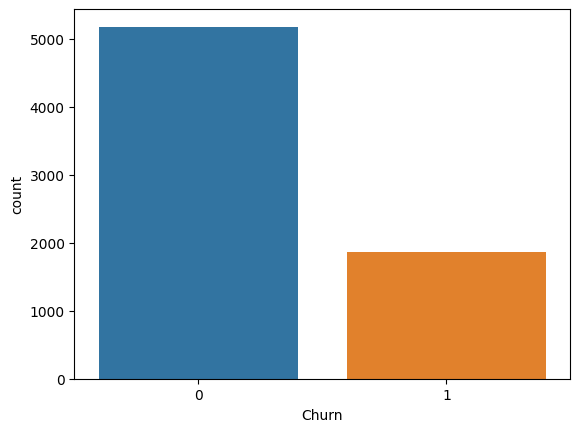

In [ ]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

Analisando o gráfico, podemos perceber que nossa variável está desbalanceada e precisamos tratar isso. Para realizar o balanceamento dos dados, utilizaremos uma técnica chamada de *Oversampling*, que consiste em realizar a criação de novas observações da classe quando há menos amostras, tendo como objetivo igualar a proporção entre as categorias.

Uma das técnicas de oversampling muito utilizada é a **SMOTE**. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.

Vamos dar uma olhada no trecho de código utilizado para balancear o nosso dataset com o auxílio da biblioteca [imbalanced-learn](https://imbalanced-learn.org/stable/index.html) e da classe [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


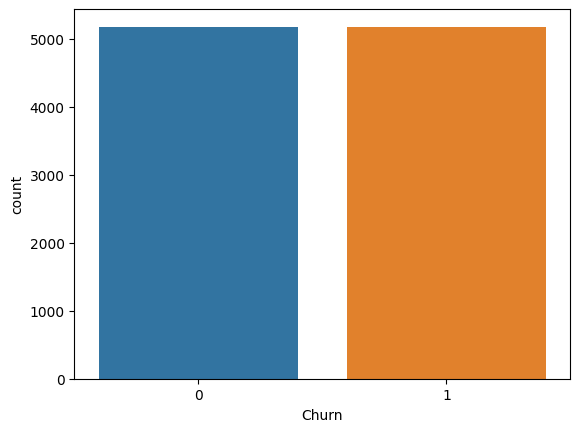

In [ ]:
ax = sns.countplot(x='Churn', data=dados_final)

In [ ]:
dados_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Agora a nossa variável classificadora está equilibrada, temos as mesmas quantidades de amostras para ambos os casos.

O balanceamento de dados é um aspecto importante ao lidar com problemas de Machine Learning, especialmente quando se trata de problemas de classificação binária com classes desbalanceadas.

Quando tem classes desbalanceadas, ou seja, uma classe possui muito mais exemplos do que a outra, o modelo de Machine Learning pode ficar enviesado em direção à classe majoritária, resultando em um desempenho insatisfatório na classificação da classe minoritária.

O objetivo do *oversampling* é melhorar a capacidade do modelo de aprender padrões da classe minoritária, tornando-o menos enviesado em direção à classe majoritária e melhorando a precisão nas previsões da classe de interesse.

Para aprofundar no tema, indico a leitura do artigo: [Como lidar com dados desbalanceados em problemas de classificação](https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9).

## Classificação vs Regressão

### **Classificação**

Quando precisamos prever a qual categoria pertence uma determinada amostra, trata-se de um problema de classificação. Alguns exemplos que podemos citar são:

- Prever se um(a) determinado(a) paciente está com Covid.
- Se um(a) cliente está propenso(a) a desistir da compra.
- Se algum(a) usuário(a) web está propenso(a) a clicar em um anúncio.

Nesses casos mencionados, a previsão se concentra em 0 ou 1 (Covid/não Covid, desistir/não desistir, clicar/não clicar) que é denominada de classificação binária, na qual existem somente duas classes. Há também casos em que a classificação se dá com mais duas classes, chamada de classificação multiclasse, como a filtragem dos e-mails em “principal”, “social”, “promoções”, “importantes” ou “fóruns”.

Entre os algoritmos de classificação podemos citar:

- [K-Nearest Neighbors (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/svm.html)
- [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

### **Regressão**

Quando precisamos prever um valor numérico específico, isso indica que estamos lidando com um problema de regressão. Alguns exemplos desses problemas estão relacionados à previsão de:

- Preços/Custos futuros
- Estoque
- Receita futura

Nessas situações, podemos utilizar algum modelo de regressão para realizar essas previsões e apresentar como resposta algum valor contínuo relacionado ao problema. Existem diferentes tipos de algoritmos de machine learning utilizados para resolver esse tipo de problema:

- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [Support Vector Regression (SVR)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

# Modelo K-Nearest Neighbors (KNN)

Imagine que você tem um conjunto de dados com pontos espalhados em um gráfico, onde cada ponto representa um objeto com características definidas. Agora, suponha que você queira classificar um novo ponto desconhecido (sem rótulo) nesse gráfico em uma determinada categoria (por exemplo, se é um gato ou um cachorro).

<div align="center">

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200616145419/Untitled2781.png" width="550" height="350">

</div>

O KNN funciona da seguinte forma:

- **Encontra os vizinhos mais próximos**: Ele procura os "K" pontos mais próximos ao novo ponto desconhecido com base na distância euclidiana (ou alguma outra métrica de distância).

- **Vota na maioria**: Dos "K" vizinhos mais próximos, verifica-se a categoria predominante entre eles (por exemplo, se a maioria deles é um gato, vota-se em "gato").

- **Classifica o novo ponto**: O novo ponto desconhecido é classificado na categoria que obteve mais votos entre seus vizinhos próximos.

Aqui estão alguns pontos importantes sobre o KNN:

- **O valor de "K" é um parâmetro importante**. O valor de *K* indica a quantidade de vizinhos mais próximos que o algoritmo levará em consideração. Um valor maior de *K* suaviza a decisão, tornando o modelo menos sensível a ruídos, mas pode torná-lo mais suscetível a classificar incorretamente regiões não bem definidas. Um valor menor de *K* torna o modelo mais sensível a ruídos, mas pode funcionar melhor em conjuntos de dados com padrões mais complexos.

- **A escolha da métrica de distância** (por exemplo, distância euclidiana, distância de Manhattan) também pode afetar o desempenho do KNN.

- O KNN não realiza um treinamento explícito com os dados de treinamento, mas armazena todos os dados, o que pode torná-lo **ineficiente para grandes conjuntos de dados**.

Em resumo, o KNN é uma abordagem simples e poderosa para classificação e regressão, que toma decisões com base nos vizinhos mais próximos dos dados de treinamento.

Ao escolher o valor de K devemos tomar cuidado com dois possíveis problemas:

- **Overfitting:** Quando o K é muito pequeno, o modelo vai se alinhar perfeitamente aos dados de entrada, porém, vai terá muito dificuldade de classificar dados novos, por ter apenas 'decorado' os dados de treinamento.
- **Underfitting**: Quando o K é muio grande, o modelo não vai conseguir aprender padrões relevantes dos dados de treinamento, tornando-o muito generalista.

## Normalizando os dados

In [ ]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

## Implementando o Modelo

Separando dados de treino e teste:

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

Criando o modelo:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')  # Valor padrão de k=5

Treinando o modelo:

In [ ]:
knn.fit(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

Testando o modelo:

In [ ]:
previsao_knn = knn.predict(X_teste)

In [ ]:
previsao_knn

array([1, 0, 0, ..., 0, 1, 1])

## KNN por trás dos panos

Para entedermos melhor como o KNN funciona, vamos fazer o processo de cálculo das distâncias de forma manual, com a biblioteca Numpy.

Para isso, vamos criar um cliente fictício com as seguintes *features*:

In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

Agora vamos normalizar os dados dela:

In [ ]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))

Agora iremos criar uma função para calcular a distância Euclidiana entre os 10 primeiros clientes da nossa base de dados:

In [ ]:
import numpy as np

def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

# Loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]     # Subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    # Exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   # Raiz quadrada da soma anterior

    return distancias

Aplicando a função:

In [ ]:
calcula_distancia(X_normalizado, Xmaria_normalizado, 10)

[9.576596663360199,
 9.164687977147782,
 8.497169420877166,
 10.037544220142902,
 7.8028994013625566,
 9.01167938964265,
 8.970041771751976,
 10.634917481179656,
 9.45035230511453,
 7.919985943117673]

Pronto, essas são as distâncias entre as *features* (características) dos 10 primeiros clientes e a Maria.

# Modelo Bernoulli Naive Bayes (BNN)

O teorema de Bayes é uma fórmula utilizada para calcular a probabilidade de um evento ocorrer sabendo que um outro evento, chamado de condicionante, já ocorreu, denominado probabilidade condicional. Sua notação é dada por P(A|B), que significa a probabilidade de A dado que B já aconteceu e é definido pela seguinte equação:

<div align="center">

<img src="https://caelum-online-public.s3.amazonaws.com/2422-machine-learning/03/Aula3-img1.gif" width="225" height="54">

</div>

Onde:

- P(B|A): probabilidade de B acontecer dado que A já aconteceu;
- P(A): probabilidade de A acontecer;
- P(B): probabilidade de B acontecer.

Falando dessa forma, pode ficar complicado de visualizar na prática o que isso realmente significa. Como o teorema de Bayes envolve probabilidade, pode ser aplicado a inúmeros contextos. Vamos utilizar aqui um exemplo envolvendo a área da saúde, mas o teorema poderia ser utilizado em outras áreas. Considere o exemplo:

<div align="center">

|  | Covid-19 (5%) | Sem Covid-19 (95%) |
|------------|------------|------------|
| Teste positivo	| 85% |	10% |
| Teste Negativo |	15% |	90% |

</div>

Primeiramente, vamos entender o que está na tabela. Sabemos, através de pesquisas realizadas anteriormente, que há uma probabilidade de 5% de ter Covid-19. Consequentemente, há uma probabilidade 95% de não ter. Quem tem a doença está na coluna “Covid-19 (5%)” e possui uma probabilidade de 85% de testar positivo e 15% de negativo. Já quem não tem está na coluna “Sem Covid-19 (95%)” e possui uma probabilidade de 10% de testar positivo e 90% de negativo.

De posse dessas informações, vamos responder à pergunta: quais as chances de ter Covid-19 dado que o teste deu positivo?

- Evento A: ter Covid-19
- Evento B: positivo no teste (evento condicionante)

Utilizando a fórmula apresentada anteriormente, precisamos definir algumas probabilidades, como:

- P(B|A): probabilidade do teste ser positivo dado que a pessoa tem Covid-19, que é de 85% ou 0.85, de acordo com a tabela.

- P(A): probabilidade de ter covid-19. Observando a tabela, temos que é de 5%, ou 0.05.

- P(B): a probabilidade do teste ser positivo.

A P(B) não conseguimos encontrar diretamente na tabela, pois a probabilidade do teste ser positivo pode acontecer quando a pessoa testada possui a doença ou não (chamado também de complementar). Logo, a probabilidade P(B) pode ser calculada como:

<br>

<div align="center">

<img src="https://caelum-online-public.s3.amazonaws.com/2422-machine-learning/03/Aula3-img2.gif" width="405" height="27">

</div>

- P(B|AC): probabilidade do teste ser positivo dado que a pessoa não possui Covid-19, que é 10% ou 0.1

- P(AC): probabilidade da pessoa não ter Covid-19, que é 95% ou 0.95.

Novamente, as informações acima foram retiradas diretamente da tabela. Pronto, agora temos todas as informações que precisamos. Colocando na equação temos que:

<div align="center">

<img src="https://caelum-online-public.s3.amazonaws.com/2422-machine-learning/03/Aula3-img3.gif" width="405" height="27">

</div>

Jogando esses valores na primeira equação, temos que:

<div align="center">

<img src="https://caelum-online-public.s3.amazonaws.com/2422-machine-learning/03/Aula3-img4.gif" width="405" height="54">

</div>

Logo, as chances de ter Covid-19, dado que o teste deu positivo, são de 31%.

## Treinamento e Teste

In [ ]:
X_treino

array([[-0.79024667, -0.52771004, -3.06083934, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       ...,
       [ 1.26542767,  1.89498006,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ]])

In [ ]:
X_teste

array([[-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [ 1.26542767,  1.89498006,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       ...,
       [ 1.26542767, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ]])

Para começarmos, precisamos importar o modelo a qual iremos trabalhar.

In [ ]:
from sklearn.naive_bayes import BernoulliNB

Agora podemos criar o modelo.

In [ ]:
bnb = BernoulliNB()

Antes de inserirmos os dados para o treinamento, precisamos binariza-los novamente. Para isso, utilizaremos um parâmetro que funcionará como se fosse um limite para transformar uma variável em binária ou não. Já que estamos trabalhando com probabilidade estatística, vamos utilizar a mediana, que é o valor central dos nossos dados ordenados.

In [ ]:
X_treino = np.where(X_treino > np.median(X_treino), 1, 0)

Agora os dados estão prontos para o treinamento.

In [ ]:
bnb.fit(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [ ]:
previsao_Bnb = bnb.predict(X_teste)

In [ ]:
previsao_Bnb

array([1, 0, 0, ..., 1, 1, 1])

# Decision Tree (Árvore de Decisão)

<div align="center">

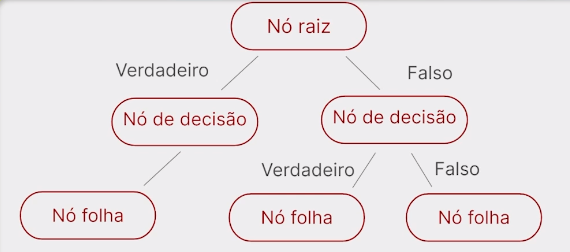

</div>

Uma árvore de decisão é um algoritmo de aprendizado de máquina supervisionado usado para tarefas de classificação e regressão. Ela representa um modelo de decisão em forma de uma estrutura hierárquica, parecida com uma árvore, onde cada nó representa uma decisão ou teste sobre uma característica específica dos dados.

Graficamente, a árvore de decisão pode ser representada de forma que cada uma das decisões tomadas no processo possam ser visualizadas. Seus elementos principais são os nós, ramos e folhas. A estrutura da árvore se inicia com um **nó inicial**, também chamado de **raiz**. A partir dela são traçadas **ramificações**, que geram novos nós e o processo se repete para os nós subsequentes até que chegue a uma **folha**, que se trata de um nó especial que tem a **informação da resposta**, sendo ela **uma categoria ou um valor previsto**.

## Vantagens e Desvantagens



As árvores de decisão têm várias vantagens e desvantagens em Machine Learning. Vamos explorar as principais delas:

### Vantagens

- **Interpretabilidade:** As árvores de decisão são modelos altamente interpretáveis, o que significa que é fácil entender o processo de tomada de decisão que levou a uma determinada previsão. As decisões são baseadas em regras claras e testes sobre características dos dados, tornando-as adequadas para análise e explicação.

- **Flexibilidade:** As árvores de decisão podem ser aplicadas a problemas de classificação e regressão, tornando-as versáteis para diferentes tipos de tarefas em Machine Learning.

- **Lidam com dados não lineares:** As árvores de decisão são capazes de modelar relações não lineares entre características e rótulos, sem a necessidade de transformações complexas dos dados.

- **Requerem menos pré-processamento:** Não são sensíveis a valores ausentes ou escalas diferentes das características, o que reduz a necessidade de pré-processamento dos dados.

- **Baixo custo computacional para previsão:** Fazer previsões com árvores de decisão é rápido, uma vez que a estrutura da árvore permite uma busca rápida e eficiente pelos ramos apropriados.




### Desvantagens

- **Overfitting**: As árvores de decisão têm a tendência de se ajustar demasiadamente aos dados de treinamento, criando ramificações muito específicas para padrões irrelevantes ou ruídos. Isso pode resultar em baixo desempenho em dados não vistos (dados de teste).

- **Instabilidade**: Pequenas variações nos dados de treinamento podem levar a grandes mudanças na estrutura da árvore, tornando o modelo instável.

- **Difícil captura de relações complexas**: Árvores de decisão podem ter dificuldades em representar relações complexas entre as características, especialmente aquelas que requerem decisões sequenciais em várias camadas.

- **Viés em direção a características dominantes**: Características com maior número de categorias ou alta cardinalidade podem ser favorecidas, pois têm mais oportunidades de serem selecionadas para os nós de decisão.

- **Tendência ao viés de atributo preferencial**: Em árvores de decisão, características que aparecem mais próximas à raiz da árvore têm mais impacto na decisão final, o que pode levar a um viés de atributo preferencial.

- **Dificuldade em lidar com dados desbalanceados**: Árvores de decisão podem ter dificuldades em lidar com classes minoritárias em problemas de classificação com conjuntos de dados desbalanceados.

Apesar das desvantagens, as árvores de decisão continuam sendo uma técnica valiosa em Machine Learning, especialmente quando combinadas com técnicas de regularização, como o corte da árvore ou o uso de florestas aleatórias, que ajudam a mitigar alguns dos problemas associados às árvores de decisão puras.

## Critérios de divisão de Nós

Em árvores de decisão, os nós são pontos de tomada de decisão que ramificam os dados em diferentes classes. Esses dados são dívididos com base em critérios, que chamamos de critérios de divisão de nós:

- Índice Gini
- Qui-Quadrado
- Entropia
- Redução da variância

Os mais utilizados são o Índice Gini e Entropia que serão os que falaremos a seguir.

### Índice Gini

A fórmula do índice Gini é dada por:

$$Gini = \sum_{k=1}^{c} p_k(1 - p_k)$$

onde *p<sub>k</sub>* é a probabilidade de ocorrência de uma dado na classe *k*.

Basicamente a fórmula diz que para encontrarmos o índice Gini, precisamos calcular a somátoria das probabilidades de ocorrência de cada dado *p<sub>k</sub>* multiplicado pela sua probabilidade de não-ocorrência *(1 - p<sub>k</sub>)*.

A ideia do índice Gini é medir o quão impuro estão os dados. Quanto maior o índice, mais impuro e heterogêneos eles estão. Quanto menor o índice, mais puro e homogêneos os dados estão.

Quanto mais puros e homogêneos os dados estão, mais fácil de classifica-los e extrair informações coerentes.

### Entropia

Já a fórmula da entropia dos dados é dada por:

$$Entropia = -\sum_{i=k}^{c} p_k \cdot \log_2(p_k)$$

onde *p<sub>k</sub>* também representa a probabilidade de ocorrência de uma dado na classe *k*.

Basicamente a entropia serve para calcular o grau de desordenação dos dados. Quanto maior a entropia, mais desordenados os dados estão, o que por consequência torna mais difícil classificar esses dados.

## Implementando o modelo

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Criando o modelo
dtc = DecisionTreeClassifier(criterion ='entropy', random_state=42)

In [ ]:
# Treinando o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Verificando as entropias
dtc.feature_importances_

array([0.03666101, 0.03866957, 0.01266043, 0.04512471, 0.        ,
       0.04738693, 0.02211895, 0.02180654, 0.        , 0.02407856,
       0.00698951, 0.0480739 , 0.        , 0.04024334, 0.00456508,
       0.04110332, 0.02482824, 0.00031031, 0.02679531, 0.02615214,
       0.        , 0.02659733, 0.03396277, 0.00078196, 0.03501075,
       0.02452249, 0.        , 0.02386299, 0.02295457, 0.        ,
       0.02359223, 0.04844877, 0.21880758, 0.        , 0.        ,
       0.04409608, 0.02979464, 0.        ])

In [ ]:
previsao_ArvoreDecisao = dtc.predict(X_teste)

In [ ]:
previsao_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

# Validação dos Modelos

## Matriz de Confusão

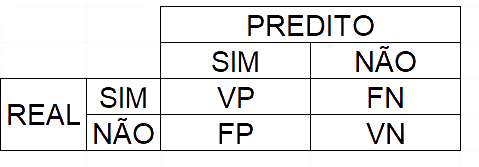

Legenda:

- VP: Verdadeiro Positivo
- FN: Falso Negativo
- FP: Falso Positivo
- VN: Verdadeiro Negativo

Basicamente, os verdadeiros são o que o modelo acertou e os falsos são os que ele errou.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Matriz do KNN
print(confusion_matrix(y_teste, previsao_knn))

[[1242  327]
 [ 248 1288]]


In [ ]:
# Matriz do BNB
print(confusion_matrix(y_teste, previsao_Bnb))

[[1039  530]
 [ 237 1299]]


In [ ]:
# Matriz da Árvore de decisão
print(confusion_matrix(y_teste, previsao_ArvoreDecisao))

[[1057  512]
 [ 259 1277]]


## Acurácia

A acurácia cálcula a razão entre o total de acertos sobre o total de amostras do teste. Ou seja, a porcentagem de acertos do modelo.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Acurácia do KNN
print(accuracy_score(y_teste, previsao_knn))

0.8148148148148148


In [ ]:
# Acurácia do BNB
print(accuracy_score(y_teste, previsao_Bnb))

0.7529790660225443


In [ ]:
# Acurácia da Árvore de Decisão
print(accuracy_score(y_teste, previsao_ArvoreDecisao))

0.7516908212560387


## Precisão

A precisão cálcula a razão entre os verdadeiros positivos e o total de previsões positivas. Ou seja, a porcentagem de acertos das previsões positivas em relação ao total de chutes.

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
# Precisão do KNN
print(precision_score(y_teste, previsao_knn))

0.7975232198142415


In [ ]:
# Precisão do BNB
print(precision_score(y_teste, previsao_Bnb))

0.7102241662110443


In [ ]:
# Precisão da Árvore de Decisão
print(precision_score(y_teste, previsao_ArvoreDecisao))

0.713806595863611


## Recall

O Recall cálcula a proporção dos verdadeiros positivos em relação ao total de positivos. Ou seja, a porcentagem de acerto das previsões positivas em relação ao total dos reais positivos.

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
# Recall do KNN
print(recall_score(y_teste, previsao_knn))

0.8385416666666666


In [ ]:
# Recall do BNB
print(recall_score(y_teste, previsao_Bnb))

0.845703125


In [ ]:
# Recall da Árvore de Decisão
print(recall_score(y_teste, previsao_ArvoreDecisao))

0.8313802083333334


## Escolhendo o melhor modelo

E agora, qual modelo devemos escolher para apresentar os dados para a empresa? Lembrando que estamos analisando o índice de **Churn** dela, ou seja, o perfil dos clientes que cancelam os serviços.

Para a nossa base de dados, os classificados como positivos são os que cancelaram os serviços dela. Portanto, para este caso é mais coveniente considerar as validações que analisam apenas os índices de acertos das previsões positivas, ou seja, a Precisão e o Recall.

Apesar de serem dois modelos de validação bem semelhantes, existe uma sútil diferença. O modelo de Precisão analisa o índice de acertos em relação ao próprio números de chutes. Já o Recall, analisa em relação ao total real de clientes que fizeram Churn da empresa.

Para escolhermos um dos dois modelos de validação, precisamos nos fazer a seguinte pergunta: a quantidade de chutes importa?

Para acertarmos mais clientes que deixarão a empresa, teremos que fazer mais chutes, o que por consequência também teremos mais erros. Mas esse chutes errados são prejudiciais de alguma forma para empresa? Bom, levando em consideração que a empresa está querendo analisar o perfil desses clientes para um possível resgate, não é prejudicial também incluir alguns que não deixarão a empresa.

Portanto, o melhor modelo de validação para este caso é o Recall, já que ele irá se basear no número total de Churns da empresa. Logo, não importa se o algoritmo terá que fazer mais chutes para acertar esses clientes, o importante é acertar os clientes. Além disso, é até melhor que incluamos alguns clientes que não possuem tanto risco assim de deixar a empresa, para que a empresa possa se precaver.

Logo, se analisarmos os resultados que obtivemos nos testes de Recall, veremos que o modelo que teve os melhores resultados preditivos foi o do **BNB (Bernoulli Naive Bayes)**, com 84,57% de acertos. Assim sendo, podemos escolhe-lo tranquilamente como o melhor modelo preditivo para análise de Churn da empresa.